In [2]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2

In [8]:
data = load_google_sheet()

🕥---FUCTION: load_google_sheet()
✅-Completed: load_google_sheet() - Time taken: 2.25 seconds


In [10]:
for text in data['free_text']:
    print(text)

very friendly caring staff treated me with respect and listened to my problem
so good so confidential
the doctor was very understanding and very knowledgeable
dr e was extremely nice
i was spoken to politely on the phone and a telephone appointment arranged with my doctor which due to a mistake on a locked phone i wasn’t able to answer but i was called back twice to complete my assessment of my health worry

very professional and very kind i feel comfortable when i attend my appointment there
faster appointment  treatment 
love the practice
the nurse miss aleksandra florko was absolutely amazing understanding kind fun thorough careful she is the best
i have been with surgery for considerable  years and was well looked after by dr param  hoping the work ethic continues apart that good service good location etc
efficient friendly  staff
good service
because the staff are very helpful
nurse alex is really helpful and look after us
friendly  professional and easily accessible
dr great
the 

In [7]:
remove_list = []
for text in data['free_text']:
    if text == '':
        pass
    elif len(text) < 12 and len(text) > 1:
        remove_list.append(text)
        
print(remove_list)

['dr great', 'it went ok', 'very caring', 'good', 'perfect', 'good for me', 'experience', 'good stuff', 'faster', 'it is ok', 'it is ok', 'good', 'attentive', 'very good', 'no thanks', 'easy access', 'dr helped', 'caring', 'organized', 'not happy', 'good']


In [91]:
data.isna().sum()

time           0
rating         0
free_text    149
do_better    375
dtype: int64

In [68]:
processed_data = pd.read_csv(f"{DATA_PATH}/data.csv")
processed_data

,time,rating,free_text,do_better,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up,5.0,admiration,0.588930,positive,0.866406,Overall Patient Satisfaction
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,5.0,admiration,0.910946,positive,0.925523,NaN
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best,5.0,admiration,0.875547,positive,0.968350,Overall Patient Satisfaction
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind,5.0,admiration,0.905494,positive,0.975969,Reception Services
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything,5.0,neutral,0.234010,neutral,0.757862,Overall Patient Satisfaction
...,...,...,...,...,...,...,...,...,...,...
542,2023-12-11 15:04:30,Extremely likely,friendly staff,NaN,5.0,neutral,0.760486,positive,0.711320,NaN
543,2023-12-11 15:05:47,Extremely likely,well attended to patient needs,NaN,5.0,caring,0.687197,neutral,0.534264,NaN
544,2023-12-11 15:12:22,Extremely likely,years i didn’t have any problem…,NaN,5.0,neutral,0.474996,neutral,0.565765,NaN
545,2023-12-11 15:33:58,Likely,NaN,NaN,4.0,neutral,0.954960,positive,0.401299,NaN


In [70]:
processed_data.shape

(547, 10)

In [69]:
processed_data.isna().sum()

time                    0
rating                  0
free_text             111
do_better             334
rating_score            5
classif                 0
classif_scores          0
sentiment               0
sentiment_score         0
improvement_labels    334
dtype: int64

<Axes: xlabel='sentiment_score', ylabel='Count'>

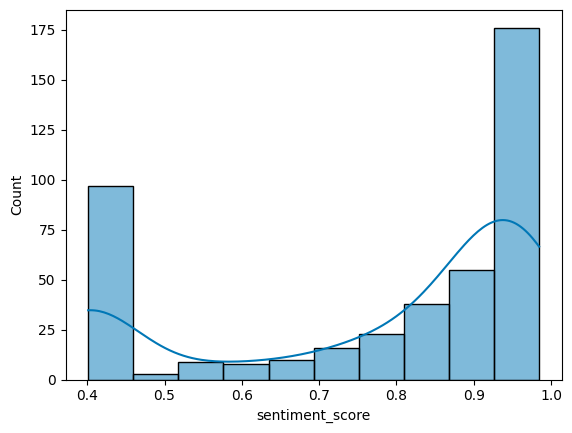

In [29]:
pos_sentiment = processed_data[processed_data['sentiment'] == "positive"]
sns.histplot(data=pos_sentiment, x='sentiment_score', color='#0077b6', kde=True)

<Axes: xlabel='sentiment_score', ylabel='Count'>

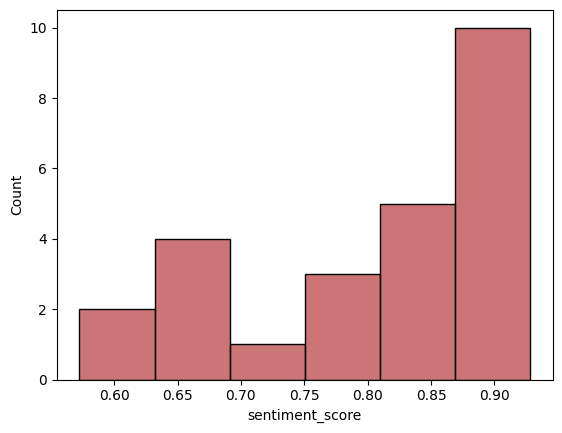

In [27]:
neg_sentiment = processed_data[processed_data['sentiment'] == "negative"]
sns.histplot(data=neg_sentiment, x='sentiment_score', color='#bc4749')

In [64]:
selected_feedback = processed_data[(processed_data['sentiment'] == "negative") & \
                                   (processed_data['sentiment_score'] >= 0.65)].sort_values(by='sentiment_score', ascending=False)






Doctor Consultations
No Improvement Suggestion
Overall Patient Satisfaction
Patient Participation Group
Phlebotomy Service & Blood Test Results
Poor Communication
Quality of Medical Advice
Reception Services
Referral Process
Telephone Service
Vaccinations


ValueError: Invalid RGBA argument: '##F2E8CF'

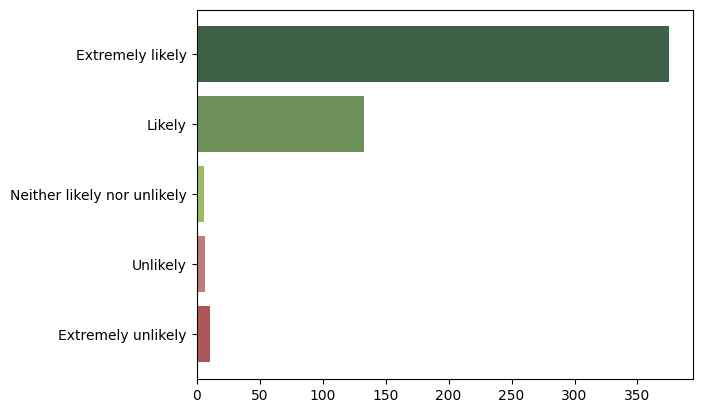

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order and corresponding colors
order = [
    'Extremely likely', 
    'Likely', 
    'Neither likely nor unlikely', 
    'Unlikely', 
    'Extremely unlikely', 
    'Don\'t know'
]

# Define a color for each category
palette = {
    'Extremely likely': '#386641',
    'Likely': '#6a994e',
    'Neither likely nor unlikely': '#A7C957',
    'Unlikely': '#CA706B',
    'Extremely unlikely': '#bc4749',
    'Don\'t know': '#F2E8CF'
}

# Create the countplot with specified order and palette
sns.countplot(data=processed_data, y='rating', order=order, palette=palette)

# Access the current Axes instance
ax = plt.gca()

# Iterate through the rectangles (bars) of the plot
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width, y, f'{int(width)}', va='center')

plt.show()



In [10]:
processed_data['rating'].value_counts()

Extremely likely               375
Likely                         133
Extremely unlikely              11
Unlikely                         7
Neither likely nor unlikely      6
Don't know                       1
Name: rating, dtype: int64

## Testing **GPT3** for Improvement Classification

In [52]:
processed_data = pd.read_csv(f"{DATA_PATH}/data.csv")
processed_data

,time,rating,free_text,do_better,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels


In [21]:
do_better_list = processed_data['do_better'].tolist()

In [22]:
do_better_list

['keep it up',
 nan,
 'no it was the best',
 'the receptionist was very unkind',
 'no i was happy with everything',
 nan,
 'no it is already perfect',
 nan,
 nan,
 nan,
 'i think it is getting better the ladies at the reception can be so rude it would not do any harm to smile be friendly put the patient at ease',
 'the basement is a bit dark and gloomy and reception area could also do with an upgrade',
 nan,
 nan,
 'earls court surgery is really lucky to have nurse alex',
 nan,
 nan,
 'yes of course she showed me the easy and a great way to apply for my medicine',
 'no answer',
 nan,
 'everything was done professionally',
 'the staff and especially the gp are very good in service',
 nan,
 nan,
 'wait time',
 nan,
 nan,
 nan,
 nan,
 'everything  fine',
 nan,
 'can’t think of anything',
 'yes they didnt have my xray for my arm  a waste off time for me there',
 nan,
 nan,
 nan,
 nan,
 'sendn me to specialistthe best',
 'more knowledge newly qualified doctors  enthusiastic',
 nan,
 nan,
 n

In [44]:
import pandas as pd
from openai import OpenAI
client = OpenAI()


def openai_classify_string(input_string):
    
    prompt = """you are an expert practice manager for a GP Surgery, you will review improvement suggestions from patients and classify them into one of the following categories:
improvement_labels_list = [
        "Reception Services",
        "Ambiance of Facility",
        "Facility Modernisation and Upgrades",
        "Nursing Quality",
        "Waiting Times",
        "Referral Process",
        "Staffing Levels",
        "Facility Accessibility",
        "Poor Communication",
        "Online Services & Digital Health",
        "Patient Safety",
        "Weekend Service Availability",
        "Telephone Service",
        "After-Hours Service",
        "Staff Training and Development",
        "Prescription Process",
        "Quality of Medical Advice",
        "Overall Patient Satisfaction",
        "Appointment System Efficiency",
        "Blood Test Results & Imaging",
        "Patient Participation Group",
        "Mental Health Services",
        "Social Prescribing Services",
        "Chronic Disease Management",
        "No Improvement Suggestion",
        "Doctor Consultations",
        "Home Visits",
        "Cancer Screening",
        "Vaccinations",
        "Test Results",
        "Clinical Pharmacist",
    ]
when you respond only select the most appropriate category and only return the category as specified in the 'improvement_labels_list', do not return any other text. if the text provided does not fit into an improvement suggestion category classify it as 'No Improvement Suggestion'
thank you."""

    completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": prompt},
        {"role": "user", "content": input_string}
    ]
    )
    
    gpt3_classification = completion.choices[0].message.content
    print(f"GPT3 working...: {gpt3_classification}")
    
    return gpt3_classification
    

def gpt3_improvement_classification(df):
    do_better_list = df['do_better'].tolist()
    gpt3_labels = []
    
    for input in do_better_list:
        if pd.isna(input):
            gpt3_labels.append('')  # Append an empty string for NaN values
        else:
            gpt3_classification = openai_classify_string(input)
            gpt3_labels.append(gpt3_classification)  # Append classification label
            
    df['improvement_gpt3'] = gpt3_labels
    
    return df

# Assuming processed_data is your DataFrame
#gpt3_improvement_classification(processed_data)
#processed_data

openai_classify_string("we need more appointments")


GPT3 working...: Appointment System Efficiency


'Appointment System Efficiency'

In [46]:
processed_data.shape[0]

546

In [50]:
import os 
api_key = os.getenv('OPENAI_API_KEY')


In [51]:
import openai

def classify_text(input_text, categories):
    openai.api_key = 'api-key'  # Replace with your OpenAI API key

    # Constructing the prompt
    prompt = f"Classify the following text into one of these categories: {', '.join(categories)}.\n\nText: \"{input_text}\"\nCategory:"
    
    response = openai.Completion.create(
      engine="text-davinci-003",  # or another model of your choice
      prompt=prompt,
      max_tokens=60,  # Adjust as needed
      n=1,
      stop=None,
      temperature=0  # Ensures determinism in response
    )

    return response.choices[0].text.strip()

# Predefined categories
categories = ["Technology", "Healthcare", "Finance", "Education"]

# Example usage
input_text = "The development of a new vaccine."
classification = classify_text(input_text, categories)
print(classification)

APIRemovedInV1: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
